# Logistic Regression

Want to know how different inputs affects a yes/no answer? Logistic regression is your new best friend! While it's best if you've read up on linear regression first, you'll probably survive even if you didn't.

<p class="reading-options">
  <a class="btn" href="/basic-ml-concepts/logistic-regression">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/basic-ml-concepts/notebooks/Logistic Regression.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="#">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

## Introduction

**We make scarves, and we're pretty lazy.** Since we're 🧶👑Crafty Stylish People👑🧶, we might have some big questions about the scarves we knit, such as:

* If we're knitting a **55-inch scarf**, how likely are we to finish it?
* If we're knitting a **70-inch scarf**, how likely are we to finish it?
* If we're knitting a **80-inch scarf**, how likely are we to finish it?

We've been keeping records for the past few weeks, and we hope they look something like this:

|📏|🧣|
|---|---|
|55 inches|**Finished!**|
|60 inches|**Finished!**|
|65 inches|**Finished!**|
|70 inches|Nope|
|75 inches|Nope|
|80 inches|Nope|

That way we can says something like, "if the scarf is over 65 inches, we're probably too lazy to finish it!" Unfortunately our records do _not_ look like that. Instead, they look something like this:

|📏|🧣|
|---|---|
|55 inches|**Finished!**|
|55 inches|**Finished!**|
|55 inches|**Finished!**|
|60 inches|**Finished!**|
|60 inches|Nope|
|70 inches|**Finished!**|
|70 inches|Nope|
|82 inches|**Finished!**|
|82 inches|Nope|
|82 inches|Nope|
|82 inches|Nope|

We can try to answer some of our questions with this data: we finish **every single 55-inch scarf**, and we finish **half of 70-inch scarves**! There's a problem with the chance of finishing an 80-inch scarf, though: **we don't have any 80-inch scarves in our dataset!** 

Let's think about what we do know:

* We rarely finish 82-inch scarves (a little longer than 80 inches)
* We finish about half of the 70-inch and 60-inch scarves (a good amount shorter)
* We're very good at finishing 55-inch scarves (much much shorter)

It sounds like we're **generally bad at finishing longer scarves,** which is totally understandable. But _how_ bad?

**This is where logistic regression rescues us.** Logistic regression can tell us two things:

* What the effect of length is on our ability to complete a scarf
* Given a length, what are our chances of completing it?

Completing our scarf is a yes/no question, right? **Logistic regression is all about predicting categories** - in this case, the category yes vs the category no. If you're predicting a number instead, you use linear regression. That's it!

Let's see what this looks like with a little code.

## Performing a logistic regression

We'll start off  with our data. We're going to use [pandas](https://pandas.pydata.org/), a super-popular Python library for doing data-y things.

In [60]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
    { 'length_in': 55, 'completed': 1 },
    { 'length_in': 55, 'completed': 1 },
    { 'length_in': 55, 'completed': 1 },
    { 'length_in': 60, 'completed': 1 },
    { 'length_in': 60, 'completed': 0 },
    { 'length_in': 70, 'completed': 1 },
    { 'length_in': 70, 'completed': 0 },
    { 'length_in': 82, 'completed': 1 },
    { 'length_in': 82, 'completed': 0 },
    { 'length_in': 82, 'completed': 0 },
    { 'length_in': 82, 'completed': 0 },
])
df

,length_in,completed
0,55,1
1,55,1
2,55,1
3,60,1
4,60,0
5,70,1
6,70,0
7,82,1
8,82,0
9,82,0


Our very tiny dataset has two columns:

* Number of inches in the atttempted scarf
* Whether we completed it or not - 1 means yes, 0 means no

We want to ask a simple question using this data: **how does length affect our ability to finish a scarf?** Since finishing a scarf is a yes/no question, we get to use **logistic regression**.

### Writing a regression

To perform our logistic regression, we're going to use a library called [statsmodels](statsmodels.org).

We use `smf.logit` to create a new logistic regression, then use `model.fit()` to teach it all about scarf-making.

In [113]:
import statsmodels.formula.api as smf

# What effect does the length of the scarf have one whether it was completed?
model = smf.logit(formula='completed ~ length_in', data=df)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.531806
         Iterations 5


The technique of writing out the relationship like `"completed ~ length_in"` was stolen from R. It uses a library called [Patsy](https://patsy.readthedocs.io/), and you can read all about it in [the statsmodels documentation](https://www.statsmodels.org/stable/example_formulas.html).

## Making predictions

Now that we've taught our regression all about how bad we are at making scarves, let's **make some predictions** to see what it learned. Along with the 80-inch scarf, let's try out a few more sizes as well.

In [62]:
# What lengths do we want to ask it about?
unknown = pd.DataFrame([
    { 'length_in': 55 },
    { 'length_in': 65 },
    { 'length_in': 75 },
    { 'length_in': 80 },
    { 'length_in': 90 },
])

# Save the predictions into a new column
unknown['predicted'] = results.predict(unknown)
unknown

,length_in,predicted
0,55,0.850526
1,65,0.651815
2,75,0.381148
3,80,0.261047
4,90,0.104122


According to the regression, we have a **26% chance to finish a 80-inch scarf**. While I'd like to say we can do better.... like I said, we're lazy.

On the other hand, we only got a 85% chance for our 55-inch scarves!! Even though we finished every single 55-inch scarf we've ever made, not completing a handful of 60-, 70-, and 82-inch scarves has made our regression a little pessimistic.

## Examining our results

Usually when you're doing logistic regression you don't care too much about making predictions. You're more concerned with figuring out things like how good your regression was, and - in this case - **how much each inch adds to our chance of failure**.

There are a few ways to look at the results, but we'll only use the fanciest since we like ✨🌟💎 𝒻𝒶𝓃𝒸𝓎 𝓉𝒽𝒾𝓃𝑔𝓈 💎🌟✨. To get the results we just look at `results.summary()`:

In [114]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Dec 2019   Pseudo R-squ.:                  0.2282
Time:                        20:30:24   Log-Likelihood:                -5.8499
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.06293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8531      4.736      1.658      0.097      -1.429      17.135
length_in     -0.1112      0.067     -1.649      0.099      -0.243       0.021
==============================================================================
"""

The part we're interested in is down at the bottom, where it says `length_in` and `coef`. `coef` stands for **coefficient**, and it's (kind of) the "how much" in "how much does length affect completion."

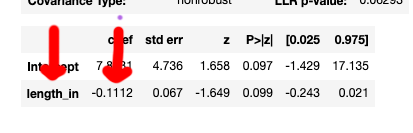

In this case, `length_in` has a coefficient of around **-0.1**. With linear regression, we could use the coefficient to put things into words easily, saying something like "every 1000 miles we get in one more accident." Sadly, **it's not so easy with logistic regression!**

## Odds and odds ratios

LOGistic regression is, yes, all about LOGarithms, and to turn this coefficient into something cool and normal we need to ask Python to undo the logarithm. The opposite of a logarithm is an exponent, so we're going to ask [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) to perform a little magic for us.

In [64]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,7.853131,2573.780516,Intercept
1,-0.111171,0.894786,length_in


The **odds ratio** column tells you what happens to the **odds** of completing a scarf each time you add one more of each variable.

* If the odds ratio is 1, it means nothing changes as we add or remove inches.
* If it's above 1, the odds increase. For example, odds ratio of 2.0 would mean our odds to finish are twice as good for each additional inch.
* If it's below 1, the odds decrease. For example, an odds ratio of 0.5 would mean our odds drop by 0.5x (half) for each additional inch.

In this case, `length_in` has an odds ratio of about 0.89. This means for each extra inch we add, we have 0.89x the odds we did before - a drop of 11%.

## What are odds?

The worst thing in history at the moment is that **you probably have no idea what odds are**. You're _definitely_ (probably maybe) thinking about **probability instead**, because in real life we never ever ever talk about odds.

Odds and probability (or % chance) are closely related to each other, though. Let's compare the two:

|words|probability|odds|
|---|---|---|
|---|`finished / attempted`|`finished / unfinished`|
|I start on 100 scarves, I finish half|50/100 = **0.5 or 50% chance**|50:50 odds, 50/50 = **1.0 or 1:1 odds**|
|I finish 20, ignore 80|20/100 = **0.2 or 20% chance**|20:80 odds, 20/80 = **0.25 or 1:4 odds**|
|I finish 75, ignore 25|75/100 = **0.75 or 75% chance**|75:25 odds, 75/25 = **3.0 or 3:1 odds**|
|I finish 996, ignore 4|996/1000 = **0.996 or 99.6% chance**|99.6:0.4 odds, 99.6/0.4 = **249.0 or 249:1 odds**|

Yeah, it gets pretty weird. If you're at a 100% chance, the odds are 100:0, or 100/0, which is _infinity_.

### Odds and probability conversion

To try and make this up to you, I'll show you how to escape from odds and back to probability (...is that even a reward?). Here are a couple formulas to convert between the two measurements:

```
probability = odds / (odds + 1)
odds = probability / (1 - probability)
```

For example, up above our **probability** for finishing a 55-inch scarf was about **0.85**, or 85%. What is that as odds?

In [95]:
0.85 / (1 - 0.85)

5.666666666666666

According to The Power Of Mathematics, an 85% probability is an odds of around 5.67.

### Using the odds ratio

There's a reason we're spending so much time discussing this, and it's so we can talk about the **odds ratio**. Remember when we looked at the coefficient/odds ratio table before?

In [112]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,7.853131,2573.780516,Intercept
1,-0.111171,0.894786,length_in


As we saw above:

> In this case, `length_in` has an **odds ratio** of about 0.89. This means for each extra inch we add, we have 0.89x the odds we did before (aka 11% less).

The odds ratio is important in data-driven reporting because it's often used to **explore charges of bias**. For example, you might find that being African American increases the odds of being searched at a traffic stop, or living in a low-income neighborhood decreases your odds of a mortgage being approved. **Learning to use the odds ratio helps you successfully investigate and report on these topics.**

Time to put our odds ratio to work!

Let's say we're aiming for a 55-inch scarf, but we'd maybe like it a little longer. But if we're less likely to finish it if it's longer, maybe we should keep it short? Let's use our odds raito to see how our chance of finishing a 55-inch scarf changes as we **add inches**.

To start, we need the **odds** for completing a 55-inch scarf. When we did the prediction up above, it gave us a **probability of 0.85** for a 55-inch scarf. Let's convert that probability to odds using our `probability / (1 - probability)` formula.

In [105]:
# Odds for finishing a 55-inch scarf
odds_55 = 0.85 / (1 - 0.85)
odds_55

5.666666666666666

If we want to add an inch, we use our table to find the **odds ratio** of 0.895. If we go one inch longer, we have to multiply the odds by the odds ratio, 0.895. Note that since the odds ratio is less than 1, that will make the odds go down.

In [106]:
# Odds for a  56 inch scarf
# Multiply the 55-inch scarf odds by the odds ratio
odds_55 * 0.895

5.071666666666666

We'll multiple it twice if we want to add two inches, moving up to a 57 inch scarf.

In [107]:
# Odds for a  57 inch scarf
# Multiply the 55-inch scarf odds by the odds ratio twice
odds_55 * 0.895 * 0.895

4.539141666666667

And one more for a 58-inch scarf...

In [108]:
# Odds for a  58 inch scarf
odds_55 * 0.895 * 0.895 * 0.895

4.062531791666666

And now we'll jump ahead to a 60-inch scarf. Five extra inches means five times multiplied by the odds ratio.

In [109]:
odds_55 * 0.895 * 0.895 * 0.895 * 0.895 * 0.895

3.2541895284197917

Even though we did all this math, we're still not really hyped about a 3.25 odds ratio. **No one understands odds, what is this number in probability?** We can use the `probability = odds / (odds + 1)` formula.

In [110]:
odds_60 = odds_55 * 0.895 * 0.895 * 0.895 * 0.895 * 0.895
odds_60 / (odds_60 + 1)

0.7649376001422655

There we go! Adding five extra inches dropped our probability of completion from 85% to 76%.

We calculated this the long long confusing way, though. Remember our friend `results.predict`? It allows us to **make predictions** if we give it a dataframe. Let's feed it the details for a sixty-inch scarf and see what it thinks the probability should be.

In [111]:
sample_df = pd.DataFrame([
    {'length_in': 60}
])

results.predict(sample_df)

0    0.765466
dtype: float64

**It matches our calculation perfectly!** ...or close enough, since we rounded 0.894786 to 0.895 so we could save a little bit of typing.

### Why not percent change?

**Why don't we just talk about percent increase instead of odds ratio?** Even though that would make way way way more sense to us, we can't! Let's look at why.

Say we have a really skilled friend who helps us out with knitting, and her help has an **odds ratio of 2.0**. She doubles the odds of completion!!! Incredible!!! But because **odds ratios are about odds and _not_ probability**, this does **not** take us from 25% to 50%. Here's what a 2x increase in odds does:

|probability|odds|odds are doubled|convert to %|new percentage|increase|
|---|---|---|---|---|---|
|50/100 or 50%|1:1 or **1.0**|2|`2 / (2 + 1)`|0.67 or **67%**|+17 percentage points|
|20/100 or 20%|1:4 or **0.25**|0.5| `0.5 / (0.5 + 1)`|0.33 or **33%**|+13 percentage points|
|75/100 or 75%|3:1 or **3.0**|6| `6 / (6 + 1)`|0.86 or **86%**|+11 percentage points|

Even though it was all a 2x odds ratio, each one had a different percent increase! **An odds ratio above 1.0 will always increase your probability, but the change depends on the probability you started at.** For example, the probability change from 55 inches to 57 inches will be different than than 65 inches to 67 inches, even though they're both a 2-inch increase.

## Review

OK, so what did we just learn?

TODO TODO TODO

Sometimes we know how much coffee we sold and how much each coffee is, and we want to know how much money we made.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × $2 per coffee`|We make ???|
|We sell four coffees|`4 × $2 per coffee`|We make ???|
|We sell sixteen coffees|`16 × $2 per coffee`|We make ???|

That is **not** regression. That is, I don't know, normal math?

Regression is when **we know how much money we made and how many coffees we sold, but not how much coffee is.** 

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × ??? per coffee`|We make \\$0|
|We sell four coffees|`4 × ??? per coffee`|We make \\$8|
|We sell sixteen coffees|`16 × ??? per coffee`|We make \\$32|

If we want to risk sounding halfway technical, linear regression is a question of "how do the inputs affect the number that comes out at the end."